In [1]:
#for data
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#math
import math

#plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#machine learning 
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#for evaluation our ML results
import statsmodels.api as sm

In [176]:
house_test = pd.read_csv('test.csv')

In [ ]:
house_train = pd.read_csv('train.csv')

In [ ]:
house_sample = pd.read_csv('sample_submission.csv')

In [179]:
print(house_train.shape)
house_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [180]:
print(house_test.shape)
house_test.head()   #Test never touch until the end

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [181]:
print(house_sample.shape)
house_sample.head()

(1459, 2)


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [182]:
house_test.fillna(0, inplace=True)

house_test=house_test.select_dtypes(include=['float', 'int'])

house_test.head()
house_test.shape

(1459, 37)

In [183]:
house_sample.fillna(0, inplace=True)

house_sample=house_sample.select_dtypes(include=['float', 'int'])

house_sample.head()
house_sample.shape

(1459, 2)

In [ ]:
sns.pairplot(data=house_test,hue='MSSubClass')

In [6]:
combined = pd.merge(house_test,house_sample,on='Id')

In [ ]:
combined.tail()

In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF1     1459 non-null   float64
 10  BsmtFinSF2     1459 non-null   float64
 11  BsmtUnfSF      1459 non-null   float64
 12  TotalBsmtSF    1459 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1459 non-null   float64
 18  BsmtHalf

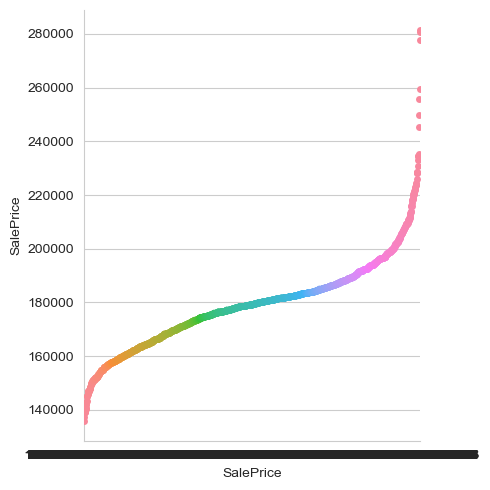

In [11]:
sns.catplot(x='SalePrice',y='SalePrice',data=combined)

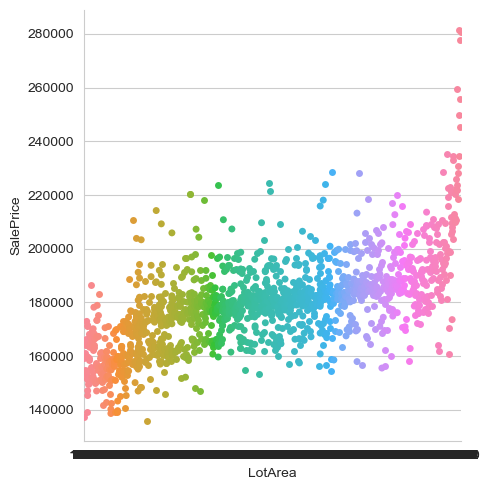

In [12]:
sns.catplot(x='LotArea',y='SalePrice',data=combined)

In [ ]:
plt.hist(house_train.SalePrice,bins=70)

plt.xlabel('Price of Houses')
plt.ylabel('Number of Houses')

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(house_test,house_sample, test_size=0.2,random_state=42)

In [ ]:
#Use either scatter plot, histograms to see if the independet variable is related to the target variable. Or use correlation to see. 

#Corelation goes from -1 to 1 (Where close to -1 to 1 mean strong correlation and near to zero means weak correlation)

In [16]:
all_cols=list(combined.columns)

In [17]:
all_cols.remove('SalePrice')

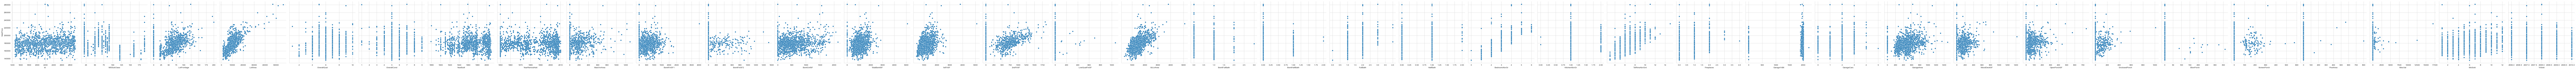

In [22]:
sns.pairplot(combined,y_vars=['SalePrice'],x_vars=all_cols,height=5,aspect=1)

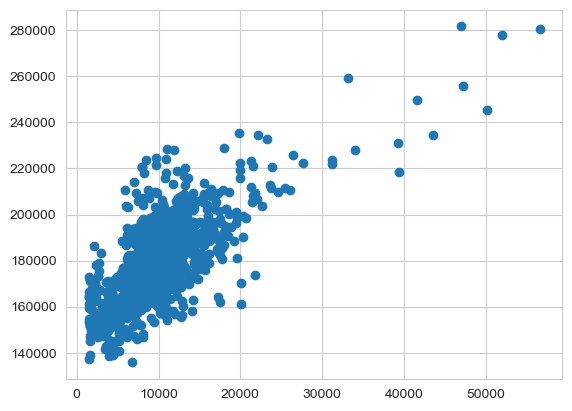

In [26]:
plt.scatter(combined['LotArea'],combined['SalePrice']) # To predict the target 

In [60]:
combined[['SalePrice','LotArea']].corr() ##Show very strong correlation of 0.7

,SalePrice,LotArea
SalePrice,1.000000,0.715795
LotArea,0.715795,1.000000


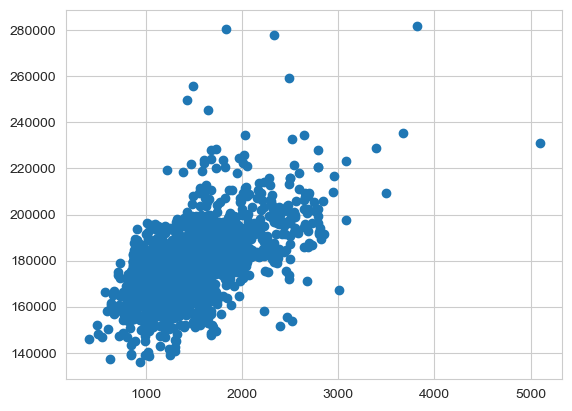

In [66]:
plt.scatter(combined['GrLivArea'],combined['SalePrice'])

In [67]:
combined[['SalePrice','GrLivArea']].corr() #Good correlation

,SalePrice,GrLivArea
SalePrice,1.000000,0.566654
GrLivArea,0.566654,1.000000


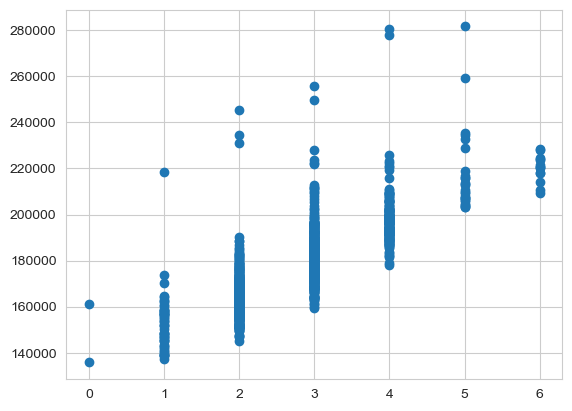

In [74]:
plt.scatter(combined['BedroomAbvGr'],combined['SalePrice'])# Grafic not as great but showing a strong correlation of 0.78

In [75]:
combined[['SalePrice','BedroomAbvGr']].corr()

,SalePrice,BedroomAbvGr
SalePrice,1.000000,0.786022
BedroomAbvGr,0.786022,1.000000


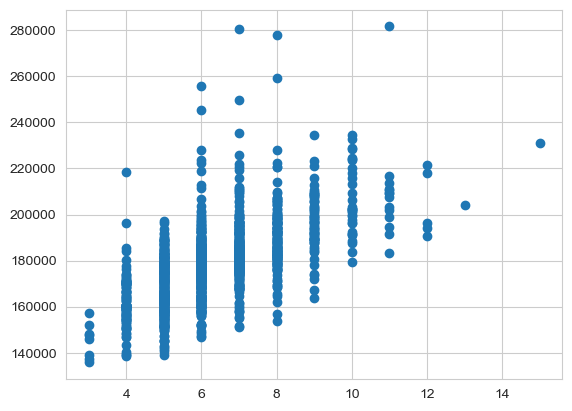

In [78]:
plt.scatter(combined['TotRmsAbvGrd'],combined['SalePrice'])#good correlation

In [79]:
combined[['SalePrice','TotRmsAbvGrd']].corr()

,SalePrice,TotRmsAbvGrd
SalePrice,1.000000,0.625592
TotRmsAbvGrd,0.625592,1.000000


In [184]:
house_train.fillna(0, inplace=True)

house_train=house_train.select_dtypes(include=['float', 'int'])

house_train.head()
house_train.shape

(1460, 38)

In [147]:
house_train = house_train.drop(house_train.index[-1])

In [148]:
house_train.shape

(1459, 38)

In [ ]:
#Therefore a LotArea, GrLivArea,BedroomAbvGr,TotRmsAbvGrd are the ones with better correlation. Best being BedroomAbvGr

In [150]:
# X=house_test[['LotArea', 'GrLivArea','BedroomAbvGr','TotRmsAbvGrd']]
# Y=house_train

# X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=729)

In [155]:
X=house_test[['LotArea', 'GrLivArea','BedroomAbvGr','TotRmsAbvGrd']]
Y=house_sample

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=729)

In [156]:
house_sample.tail()

,Id,SalePrice
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659
1458,2919,187741.866657


In [157]:
#time to creat logistic regression
logreg= LinearRegression()
logreg.fit(X_train,y_train)

y_prediction = logreg.predict(X_test)

In [158]:
rmse= mean_squared_error(y_test,y_prediction,squared=False)

In [159]:
print('RMSE:',rmse)

RMSE: 1956.2975270226332


In [160]:
np.mean((y_test -y_prediction)**2)

C:\Users\Rafael Zanatta Ennes\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Id           1.783582e+05
SalePrice    1.218199e+07
dtype: float64